# LogGabor user guide


Table of content
----------------

* [What is the LogGabor package?](LogGabor.ipynb#What-is-the-LogGabor-package?) 

* [Installing](LogGabor.ipynb#Install) 

* [Importing the library](LogGabor.ipynb#Importing-the-library)

* [Properties of log-Gabor filters](LogGabor.ipynb#Properties-of-log-Gabor-filters)

* [Testing filter generation](LogGabor_testing-filter-generation.ipynb) 

* [Testing on a sample image](LogGabor.ipynb#Testing-on-a-sample-image) 

* [Building a pyramid](LogGabor_making-a-pyramid.ipynb) 

* [An example of fitting images with log-Gabor filters](LogGabor_fit-example.ipynb) 

## Importing the library

In [1]:
%load_ext autoreload
%autoreload 2
from LogGabor import LogGabor
parameterfile = 'https://raw.githubusercontent.com/bicv/LogGabor/master/default_param.py'
lg = LogGabor(parameterfile)

To install the dependencies related to running this notebook, see [Installing notebook dependencies](#Installing-notebook-dependencies).

[Back to top](#LogGabor-user-guide)

In [2]:
import holoviews as hv
#hv.notebook_extension('bokeh')
%load_ext holoviews.ipython
%output size=150 dpi=120
%load_ext autoreload
%autoreload 2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing filter generation

Here, we will generate some LogGabor filters.

Defining a reference log-gabor  (look in the corners!)

In [3]:
sf_0 = .02 # TODO .1 cycle / pixel (Geisler)
params= {'sf_0':sf_0, 'B_sf': lg.pe.B_sf, 'theta':0., 'B_theta': lg.pe.B_theta}

In [4]:
%opts Image (cmap='gray')
%opts Image.Fourier_domain (cmap='hot')

In [5]:
def fourier_domain(arr):
    return hv.Image(arr, group='Fourier domain',
                 key_dimensions=[r'$f_Y$', r'$f_X$'],
                 value_dimensions=[hv.Dimension('Fourier', range=(0,0.01))])
def image_domain(arr):
    return hv.Image(arr,group='Image domain',
                 key_dimensions=[r'$Y$', r'$X$'],
                 value_dimensions=[hv.Dimension('Image', range=(-1,1))])

:Layout
   .Fourier_domain.I :Image   [x,y]   (z)
   .Image_domain.I   :Image   [x,y]   (z)
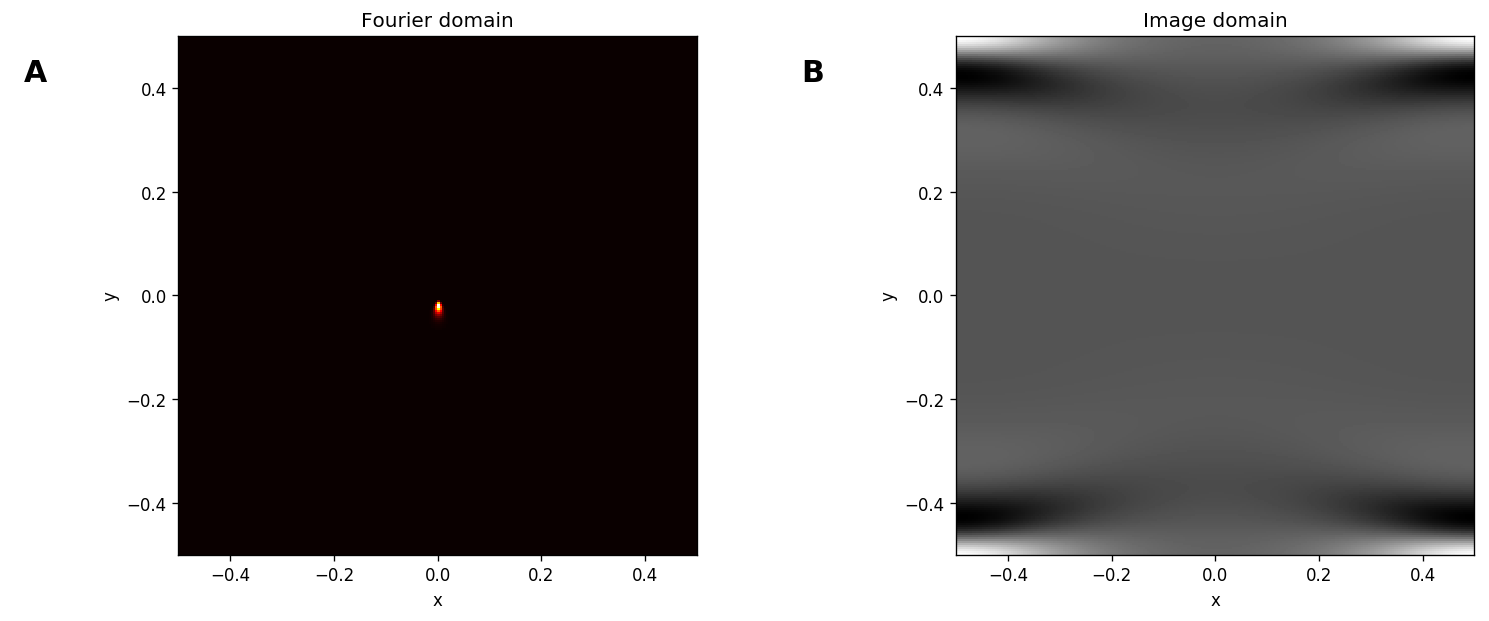

In [6]:
FT_lg = lg.loggabor(0, 0, **params)
(fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
+ image_domain(lg.normalize(lg.invert(FT_lg), center=False)))

Translating in the middle:

In [7]:
N_X, N_Y = 256, 256 #image.shape
help(lg.translate)

Help on method translate in module SLIP.SLIP:

translate(image, vec, preshift=True) method of LogGabor.LogGabor.LogGabor instance
    Translate image by vec (in pixels)
    
    Note that the convention for coordinates follows that of matrices: the origin is at the top left of the image, and coordinates are first the rows (vertical axis, going down) then the columns (horizontal axis, going right).



same params, larger frequency with sf_0

:Layout
   .Fourier_domain.I :Image   [x,y]   (z)
   .Image_domain.I   :Image   [x,y]   (z)
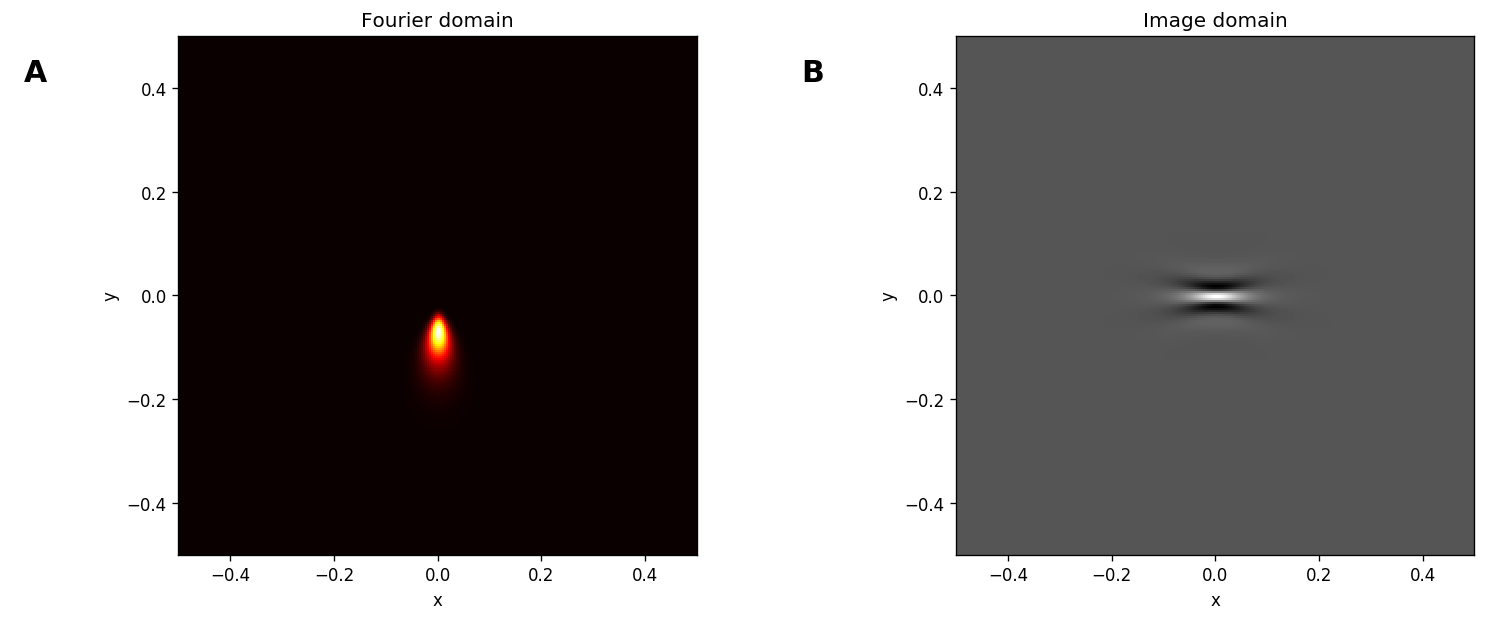

In [8]:
params2 = {'sf_0':sf_0*4, 'B_sf':lg.pe.B_sf, 'theta':0., 'B_theta':lg.pe.B_theta}
FT_lg = lg.loggabor(N_X/2, N_Y/2, **params2)
(fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
+ image_domain(lg.normalize(lg.invert(FT_lg), center=False)))

Same params, but larger frequency with sf_0

In [9]:
params2 = {'sf_0':sf_0*4, 'B_sf':lg.pe.B_sf, 'theta':0., 'B_theta':lg.pe.B_theta}

:Layout
   .Fourier_domain.I :Image   [x,y]   (z)
   .Image_domain.I   :Image   [x,y]   (z)
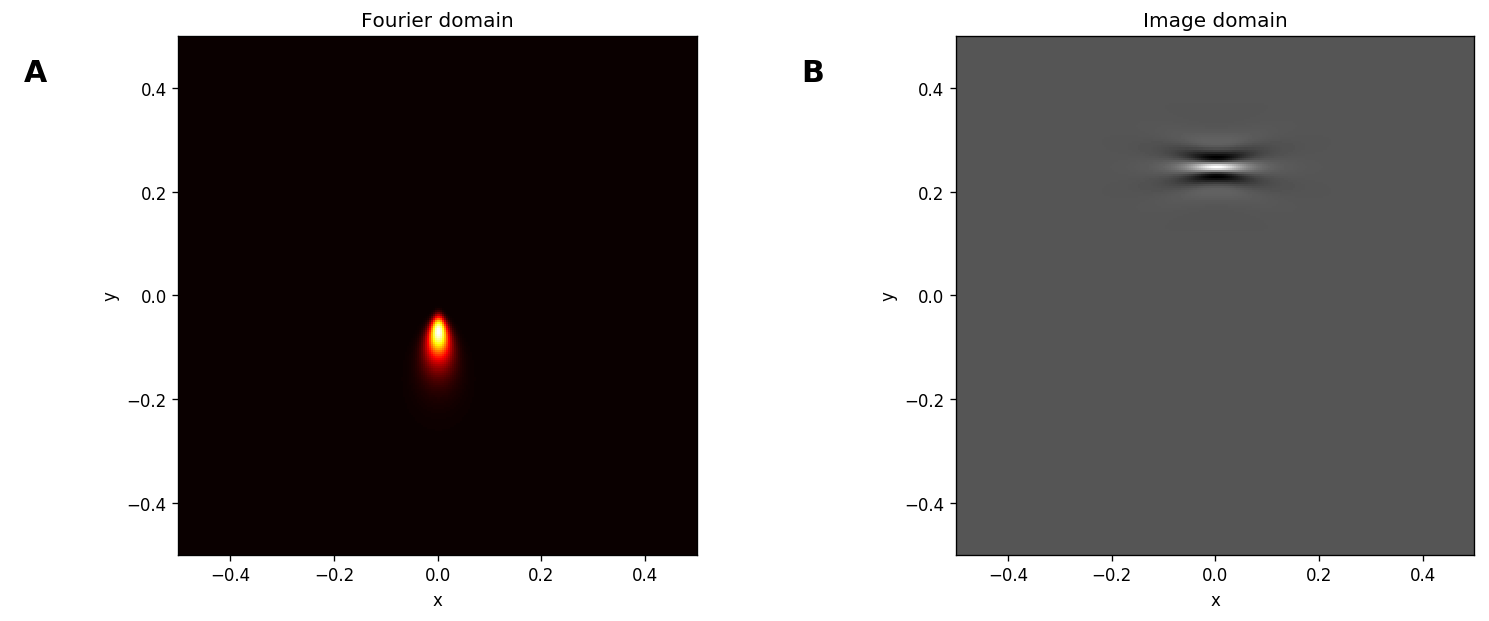

In [10]:
FT_lg = lg.loggabor(N_X/4, N_Y/2, **params2)
(fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
+ image_domain(lg.normalize(lg.invert(FT_lg), center=False)))

Narrower with a smaller B_theta:

:Layout
   .Fourier_domain.I :Image   [x,y]   (z)
   .Image_domain.I   :Image   [x,y]   (z)
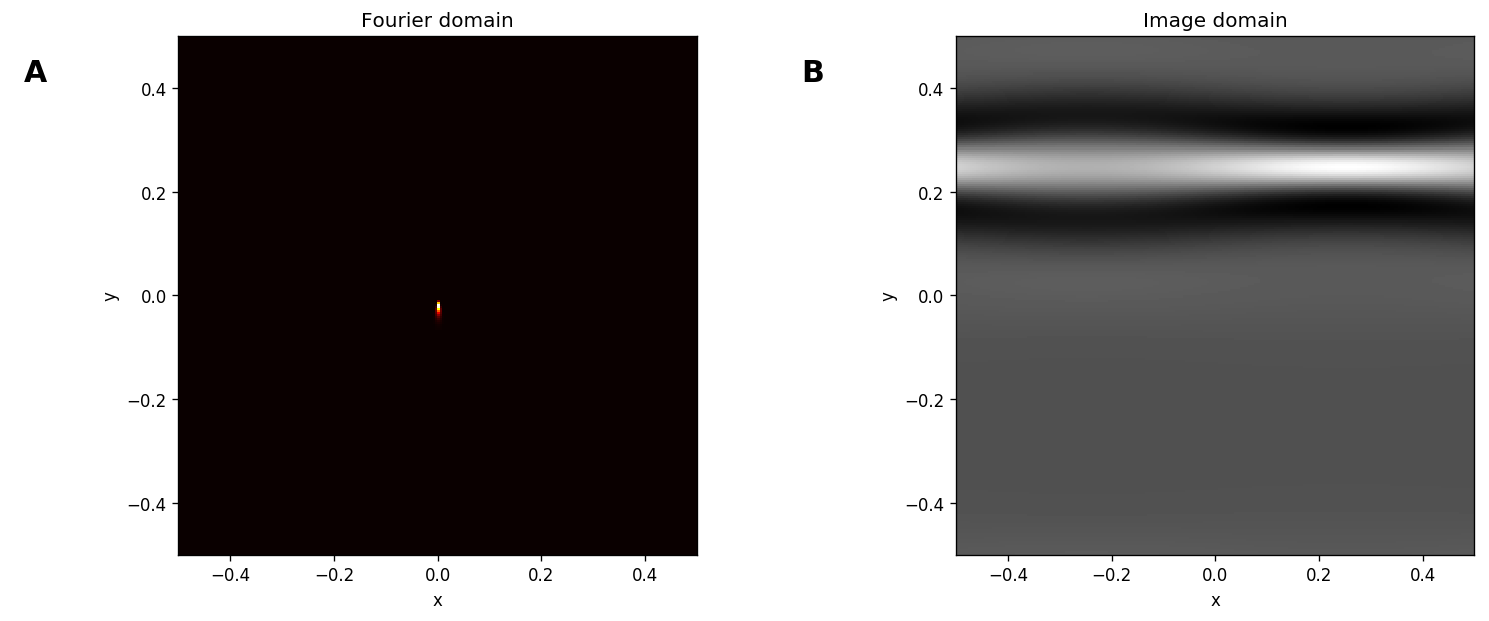

In [11]:
params3 = {'sf_0':sf_0, 'B_sf':lg.pe.B_sf, 'theta':0., 'B_theta':lg.pe.B_theta/2}
FT_lg = lg.loggabor(N_X/4, 3*N_Y/4, **params3)
(fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
+ image_domain(lg.normalize(lg.invert(FT_lg), center=False)))

Broader spectrum with B_sf

:Layout
   .Fourier_domain.I :Image   [x,y]   (z)
   .Image_domain.I   :Image   [x,y]   (z)
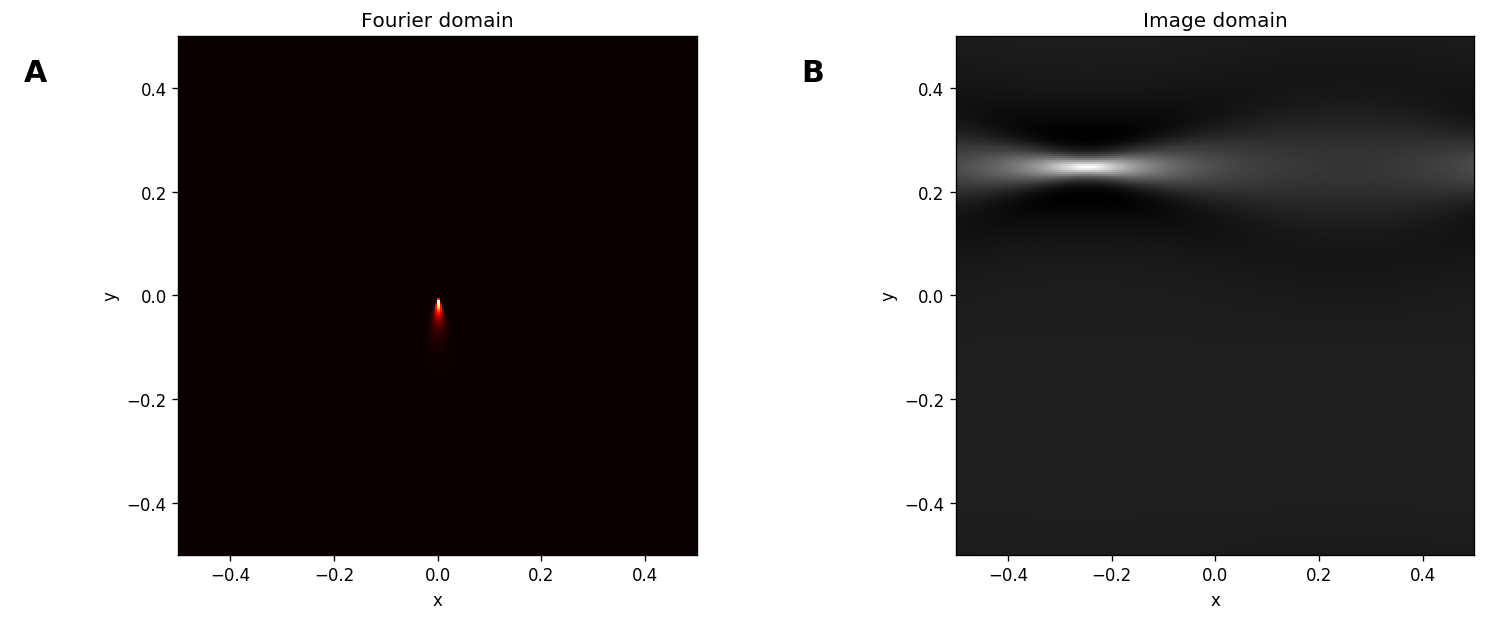

In [12]:
params4 = {'sf_0':sf_0, 'B_sf':lg.pe.B_sf*2., 'theta':0., 'B_theta':lg.pe.B_theta}
FT_lg = lg.loggabor(N_X/4, N_Y/4, **params4)
(fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
+ image_domain(lg.normalize(lg.invert(FT_lg), center=False)))

Using a function to explore these parameters:

In [13]:
def lg_explore(param_name, param_range, angle=False, movie=True):
    if movie:
        amp_map, phase_map = hv.HoloMap(), hv.HoloMap()
    else:
        ims = []
    for param_ in param_range:
        if angle:
            title = np.str(param_*180/np.pi) + r'$^0$'
        else:
            title = np.str(param_)
        if param_name=='phase':
            FT_phase = np.exp(-1j*param_)
            params_=params.copy()
        else:
            FT_phase = 1
            params_=params.copy()
            params_.update({param_name:param_})
        FT_lg = lg.loggabor(N_X/2, N_Y/2, **params_) * FT_phase
        
        amp =   fourier_domain(lg.normalize(np.absolute(FT_lg), center=False))
        phase = image_domain(lg.normalize(lg.invert(FT_lg),  center=False))
        
        if movie:
            amp_map[param_] = amp
            phase_map[param_] = phase
        else:
            ims.append((amp + phase))
    if movie:
        return amp_map + phase_map
    else:
        return np.sum(ims).cols(2)

Now exploring these parameters individually:

In [14]:
lg_explore(param_name='phase', 
           param_range=np.linspace(0, np.pi, 24, endpoint=False), angle=True)

:Layout
   .Fourier_domain.I :HoloMap   [Default]
      :Image   [x,y]   (z)
   .Image_domain.I   :HoloMap   [Default]
      :Image   [x,y]   (z)

In [15]:
lg_explore(param_name='theta', 
           param_range=lg.theta, 
           angle=True)

:Layout
   .Fourier_domain.I :HoloMap   [Default]
      :Image   [x,y]   (z)
   .Image_domain.I   :HoloMap   [Default]
      :Image   [x,y]   (z)

In [16]:
lg_explore(param_name='B_theta', 
           param_range=lg.pe.B_theta*np.logspace(-.3, .2, 6), angle=True)

:Layout
   .Fourier_domain.I :HoloMap   [Default]
      :Image   [x,y]   (z)
   .Image_domain.I   :HoloMap   [Default]
      :Image   [x,y]   (z)

Here, we define a pyramid by defining a vector of ``sf_0`` values that we use later in Matching Pursuit (see https://github.com/bicv/SparseEdges):

In [17]:
#n_levels = int(np.log(np.max((lg.pe.N_X, lg.pe.N_Y)))/np.log(lg.pe.base_levels))
print('for an image of size', np.max((lg.pe.N_X, lg.pe.N_Y)), ', at base lg.pe.base_levels=', lg.pe.base_levels, ', we have n_levels=', lg.n_levels)
#v_sf_0 = .5 * (1 - 1/n_levels) / np.logspace(0, n_levels, n_levels, base=lg.pe.base_levels)[::-1]
print('Range of spatial frequencies (in cycles per image pixel) =', lg.sf_0)
print('Range of spatial frequencies (in pixels per cycle) =', 1./lg.sf_0)
print('Range of spatial frequencies (in cycles per image size) =', lg.pe.N_X * lg.sf_0)
lg_explore(param_name='sf_0', param_range=lg.sf_0)

for an image of size 256 , at base lg.pe.base_levels= 1.618 , we have n_levels= 11
Range of spatial frequencies (in cycles per image pixel) = [0.45454545 0.29349239 0.18950313 0.122359   0.07900516 0.05101231
 0.03293779 0.02126738 0.01373199 0.00886652 0.00572496]
Range of spatial frequencies (in pixels per cycle) = [  2.2          3.40724334   5.2769578    8.17267242  12.65740166
  19.60311249  30.36026111  47.02036246  72.82264397 112.78384934
 174.67364514]
Range of spatial frequencies (in cycles per image size) = [116.36363636  75.13405254  48.51280029  31.32390324  20.22532009
  13.05915069   8.43207504   5.44444974   3.51539008   2.26982854
   1.4655903 ]


:Layout
   .Fourier_domain.I :HoloMap   [Default]
      :Image   [x,y]   (z)
   .Image_domain.I   :HoloMap   [Default]
      :Image   [x,y]   (z)

geometric mean distances across frequencies :

In [18]:
scaling = np.sqrt(lg.sf_0[:, np.newaxis]*lg.sf_0[np.newaxis, :])
print('mean scaling=', scaling.mean())

mean scaling= 0.08057006396392116


In [19]:
lg_explore(param_name='B_sf', param_range=lg.pe.B_sf*np.logspace(-.6, .6, 9))

:Layout
   .Fourier_domain.I :HoloMap   [Default]
      :Image   [x,y]   (z)
   .Image_domain.I   :HoloMap   [Default]
      :Image   [x,y]   (z)

[Back to top](#LogGabor-user-guide)

## more book keeping

In [20]:
%load_ext watermark
%watermark

2018-06-20T14:47:46+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)
system     : Darwin
release    : 17.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit


In [21]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, SLIP, LogGabor

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.4.0
OS Darwin 17.6.0 x86_64 i386 64bit
numpy 1.14.5
scipy 1.1.0
matplotlib 2.2.2
SLIP 20171205
LogGabor 2017-12-05.binder
Wed Jun 20 14:47:46 2018 CEST

[Back to top](#LogGabor-user-guide)
[Back to the LogGabor user guide](LogGabor.ipynb#LogGabor-user-guide)